<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation***

###**Tenggat Waktu: 25 September 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab3_NPM_Nama.ipynb**. Contoh: F_Lab3_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **25 September 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan penalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [89]:
# Isi dengan data diri Anda
NAMA = "Yusuf Fakhri Aldrian"
KELAS = "B"
NPM = "1906351096"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["1906353776"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column",
             "https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html",
             "https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32",
             "https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba",
             "https://www.statology.org/countif-python/",
             "https://stackoverflow.com/questions/30836032/why-does-np-percentile-return-nan-for-high-percentiles/45175194",
             "https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling",
             "https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_ltwo_normalization.htm",
             "https://stats.stackexchange.com/questions/331926/explain-meaning-and-purpose-of-l2-normalization",
             "https://machinelearningmastery.com/vector-norms-machine-learning/#:~:text=Like%20the%20L1%20norm%2C%20the,vector%20norms%20in%20machine%20learning."]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yusuf Fakhri Aldrian dari kelas B dengan NPM 1906351096, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yusuf Fakhri Aldrian)


## **Preprocessing pada Titanic Dataset**

Sumber: ToT Microcredential AI-Data Science Dirjen Dikti, dengan beberapa perubahan


### Import Library dan Data

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [3]:
titanic1 = pd.read_csv('data_titanic1.csv')

In [ ]:
# Mencetak dimensi data
print("data: ", titanic1.shape)

data:  (900, 14)


In [ ]:
# Membaca kolom-kolom pada DataFrame
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     900 non-null    int64  
 1   survived   900 non-null    int64  
 2   name       900 non-null    object 
 3   sex        900 non-null    object 
 4   age        804 non-null    float64
 5   sibsp      900 non-null    int64  
 6   parch      900 non-null    int64  
 7   ticket     900 non-null    object 
 8   fare       900 non-null    float64
 9   cabin      281 non-null    object 
 10  embarked   898 non-null    object 
 11  boat       389 non-null    object 
 12  body       90 non-null     float64
 13  home.dest  742 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 98.6+ KB


### **Variable Descriptions:**

`pclass`:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

`survival`:        Survival
                (0 = No; 1 = Yes)

`name`:           Name

`sex`:             Sex

`age`:             Age

`sibsp`:           Number of Siblings/Spouses Aboard

`parch`:           Number of Parents/Children Aboard

`ticket`:          Ticket Number

`fare`:            Passenger Fare

`cabin`:           Cabin

`embarked`:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

`boat`:            Lifeboat

`body`:            Body Identification Number

`home.dest`:       Home/Destination

**SPECIAL NOTES:**

`pclass` is a proxy for socio-economic status (SES)
 
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

`pclass` mengacu pada kelas penumpang (1, 2, 3) yang merepresentasikan kelas sosial ekonomi. 

In [ ]:
titanic1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Basic Summary Statistic

In [ ]:
titanic1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,900.000000,900.000000,804.000000,900.000000,900.000000,900.000000,90.000000
mean,1.974444,0.441111,31.365672,0.455556,0.393333,42.238407,160.266667
std,0.832069,0.496796,14.663238,0.808205,0.814742,59.740782,92.476514
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,10.500000,80.250000
50%,2.000000,0.000000,30.000000,0.000000,0.000000,24.075000,152.000000
75%,3.000000,1.000000,41.000000,1.000000,0.000000,50.123950,248.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,322.000000


Dengan method "describe" kita mendapatkan basic statistics untuk atribut numerik. 

Apa yang bisa diamati?
Pada atribut "fare", standard deviasi tampak tinggi, jauh di atas mean, perlu dilihat lebih jauh distribusi datanya.

In [ ]:
# Menampilkan summary dari nonnumeric atribute
display(titanic1.describe(include=np.object))

,name,sex,ticket,cabin,embarked,boat,home.dest
count,900,900,900,281,898,389,742
unique,899,2,617,178,3,25,366
top,"Connolly, Miss. Kate",male,CA 2144,C23 C25 C27,S,4,"New York, NY"
freq,2,560,8,6,637,31,64


Pada tabel di atas, "unique" menunjukkan ada berapa variasi nilai dalam suatu atribut. 
Jika "unique" bernilai 1, atribut tersebut dapat dihapus, karena nilainya sama untuk semua baris.

In [ ]:
# Plot beberapa kolom untuk melihat distribusi frekuensinya
def countplot(column):
    return sns.countplot(x= column, data= titanic1)

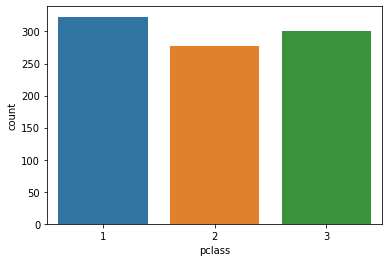

In [ ]:
countplot('pclass')

Berdasarkan plot di atas, terlihat bahwa yang tinggi frekuensinya adalah kelas 1 (upper social economic status).

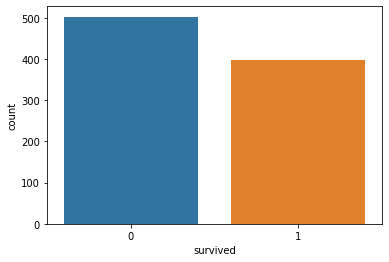

In [ ]:
countplot('survived')

Berdasarkan plot di atas, terlihat bahwa penumpang yang survived lebih sedikit.

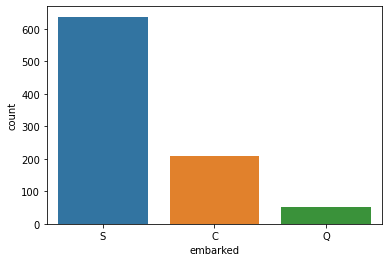

In [ ]:
countplot('embarked')

Berdasarkan plot di atas, terlihat bahwa Southampton merupakan embarkasi terbanyak.

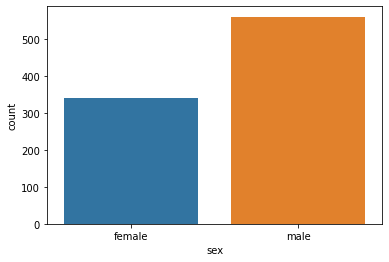

In [ ]:
countplot('sex')

Berdasarkan plot di atas, terlihat bahwa penumpang perempuan lebih sedikit dibanding laki-laki.

In [ ]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
titanic1.corr(method='pearson')

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.300993,-0.407413,0.048759,0.041097,-0.523887,-0.060393
survived,-0.300993,1.000000,-0.080387,0.050267,0.139735,0.251140,NaN
age,-0.407413,-0.080387,1.000000,-0.192277,-0.157046,0.164158,0.000347
sibsp,0.048759,0.050267,-0.192277,1.000000,0.403285,0.155961,0.077668
parch,0.041097,0.139735,-0.157046,0.403285,1.000000,0.222607,-0.031701
fare,-0.523887,0.251140,0.164158,0.155961,0.222607,1.000000,-0.040643
body,-0.060393,NaN,0.000347,0.077668,-0.031701,-0.040643,1.000000


In [1]:
# Mendapatkan nilai korelasi dari atribut nonnumerik, dengan method "chi2"
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

Chi-square dapat digunakan untuk melihat pengaruh atau korelasi dua buah variabel kategorikal dan mengukur
kuatnya hubungan antara variabel yang satu dengan
variabel kategorikal lainnya. Dalam pengertian yang lebih umum, chi-square berguna untuk melihat apakah distribusi variabel kategori berbeda satu sama lain.

In [7]:
# Korelasi antara survived dengan pclass
compute_freq_chi2(titanic1.survived,titanic1.pclass)

Frequency table
pclass      1    2    3
survived               
0         123  158  222
1         200  119   78
ChiSquare test statistic:  81.61469423204498
p-value:  1.894935039255057e-18


Penumpang kelas 3 yang tidak survive mencapai 200 orang lebih.

In [8]:
# Korelasi antara survived dengan embarked
compute_freq_chi2(titanic1.survived,titanic1.embarked)

Frequency table
embarked    C   Q    S
survived              
0          85  38  380
1         123  15  257
ChiSquare test statistic:  28.09128646800554
p-value:  7.944281939252533e-07


Embarkasi S paling banyak yang tidak survived

# Data Preprocessing

*Data Preparation* atau *data preprocessing* adalah suatu proses pembersihan dan transformasi pada *raw data* sebelum diproses dan dianalisis. Pada beberapa algoritma prediksi, dibutuhkan *preprocessing* khusus agar algoritma dapat berjalan dengan baik.

**DISCLAIMER!**  Pada contoh ini, *preprocessing* yang 
dilakukan dimaksudkan untuk algoritma yang memiliki karakteristik:
* sensitif terhadap outlier
* fitur-fiturnya perlu memiliki range yang setara

### **SOAL 1**

In [4]:
# Import data_titanic2
titanic2 = pd.read_csv('data_titanic2.csv')

In [5]:
# Menggabungkan dua data frame
frames = [titanic1, titanic2] 
merged_titanic = pd.concat(frames).reset_index(drop=True)

In [11]:
merged_titanic.shape

(1359, 14)

(a) Dari data merged_titanic di atas, apakah terdapat redudansi data? Implementasikan dengan code!

In [6]:
# 1(a) Implementasi code di sini.

print("Redudansi data ada sebanyak ") 
print(merged_titanic.duplicated().value_counts()[1])

#print(merged_titanic.describe(include=np.object).name[0] #count sum
#- merged_titanic.describe(include=np.object).name[1]) #unique

Redudansi data ada sebanyak 
50


(b) Apa yang dapat Anda lakukan untuk menangani redudansi data tersebut? Implementasikan dengan code! Hint: [Dokumentasi Drop Duplicate](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html)

In [7]:
# 1(b) Implementasi code di sini.

merged_titanic = merged_titanic.drop_duplicates()
print("data: ", merged_titanic.shape)

data:  (1309, 14)


(c) Berikan alasan mengapa redudansi data perlu ditangani?
> Bisa menyebabkan data tidak konsisten karena saat kita Insert/Delete/Update, itu harus dilakukan di lebih dari satu data. Selain itu, ukuran database juga lebih besar.


## Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya.

Outlier dapat ditangani dengan melakukan hal-hal berikut ini:

*   Jika persentase outliers tidak signifikan, opsi yang mungkin dilakukan adalah drop column/row.
*   Jika datanya relatif sedikit, opsi yang mungkin dilakukan adalah mengisi dengan nilai statistik tertentu Pengisian data dapat dilakukan dengan:
  * Nilai rata-rata 
  * Nilai median
  * Nilai modus
*   Jika terdapat human error, maka opsi yang mungkin adalah memperbaiki dengan manual.
*   Jika asumsi data normal, maka outlier dapat dibiarkan saja.



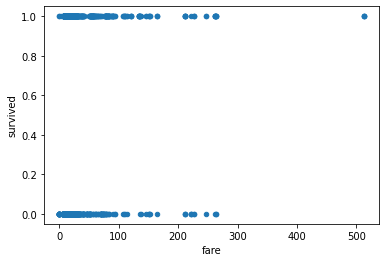

In [8]:
merged_titanic.plot.scatter(x="fare", y='survived', figsize=(6,4))

Dari scatter plot di atas terlihat bahwa ada nilai fare yang sangat besar (outlier) pada penumpang yang survived.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


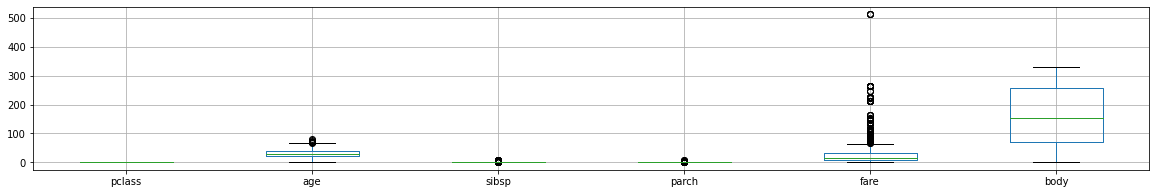

In [9]:
data = merged_titanic.drop(['survived'],axis=1)
data.boxplot(figsize=(20,3))

Boxplot juga dapat digunakan untuk menunjukkan adanya outlier. Bagian utama boxplot merupakan sebuah kotak Box yang menyajikan interquartile range (IQR). Garis yang merupakan perpanjangan dari box dinamakan dengan whiskers. Nilai yang berada di atas atau dibawah whisker dinamakan nilai outlier atau ekstrim.

### **SOAL 2**

(a) Dari boxplot yang Anda lihat, atribut apa yang mengandung outlier paling banyak?

> Dari boxplot, atribut yang paling banyak mempunyai outlier adalah fare.

(b) Implementasikan code untuk menampilkan banyaknya outlier pada atribut tersebut!

In [48]:
# 2(b) Implementasi code di sini

merged_titanic_f = merged_titanic['fare']
sorted(merged_titanic_f)
q1_t, q3_t = np.nanpercentile(merged_titanic_f,[25,75])
iqr = q3_t - q1_t
lower_bound = q1_t -(1.5 * iqr) 
upper_bound = q3_t +(1.5 * iqr) 

print("Banyak outlier pada atribut fare")
print(sum(merged_titanic_f < lower_bound) + sum(merged_titanic_f >  upper_bound))

Banyak outlier pada atribut fare
171


(c) Apa yang dapat Anda lakukan untuk menangani outlier tersebut? Implementasikan dengan code!

In [62]:
# 2(c) Implementasi code di sini

cleaned_fare = merged_titanic[merged_titanic['fare'].between(lower_bound, upper_bound)]
print("Sebelum outlier dihapus")
print(merged_titanic.shape)
print("Setelah outlier dihapus")
print(cleaned_fare.shape)

Sebelum outlier dihapus
(1309, 14)
Setelah outlier dihapus
(1137, 14)


## Missing Values

Terkadang data mungkin dalam format yang benar, tetapi beberapa nilainya hilang.

*   Nilai yang hilang terjadi ketika tidak ada nilai data yang disimpan untuk suatu variabel (fitur) dalam suatu observasi.
*   Biasanya missing value di datase muncul sebagai “?”, “T/A”, 0 atau hanya sel kosong.

Untuk menangani missing values, tidak terdapat jawaban tunggal yang selalu bekerja untuk semua skenario, karena  tentunya penanganan missing values harus disesuaikan dengan kondisi data atau fitur yang memiliki missing values. Namun, terdapat beberapa opsi umum yang dapat dipertimbangkan, yaitu: 

*   Periksa lagi dengan orang/kelompok yang mengumpulkan data.
*   Jika kita tidak mengetahui nilai yang hilang, opsi yang mungkin adalah menghapus/drop missing values.
    * Menghapus kolom yang mengandung missing values, atau 
    * Menghapus beberapa baris data yang mengandung missing values.
*  Jika data relatif sedikit, opsi yang mungkin adalah mengganti/replace nilai missing values. 
    * Mengganti nilai missing value dengan nilai mean keseluruhan variabel.
    * Jika variabelnya non-numerik, ganti nilai missing value dengan frekuensi/modus. 
*   Jika kita berasumsi data tersebut tetap akan berguna meskipun ada fitur yang hilang, maka kita dapat membiarkan missing values. 






In [63]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [64]:
cek_null(merged_titanic)

           Total   Percent
body        1188  0.907563
cabin       1014  0.774637
boat         823  0.628724
home.dest    564  0.430863
age          263  0.200917
embarked       2  0.001528
fare           1  0.000764


Terdapat beberapa atribut memiliki null value yang sangat banyak, atribut body memiliki null value yang paling banyak hingga 90%, "cabin" hingga 77%

In [65]:
# Melihat isi cabin (20 baris pertama)
merged_titanic['cabin'].head(20)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
9         NaN
10    C62 C64
11    C62 C64
12        B35
13        NaN
14        A23
15        NaN
16    B58 B60
17    B58 B60
18        D15
19         C6
Name: cabin, dtype: object

In [66]:
# Melihat berapa penumpang yang survive di tiap cabin
(merged_titanic
 .groupby([merged_titanic.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN


In [67]:
# Melihat rerata fare di tiap cabin, untuk kelompok yang survived dan tidak survived
(merged_titanic
 .groupby([merged_titanic.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN


In [72]:
# Drop atribut yang dianggap tidak penting
titanic_cleaned = merged_titanic.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


Atribut-atribut tersebut dianggap tidak penting berdasarkan pertimbangan, nalar, atau basic knowledge manusia. Sebagai contoh, apabila kita ingin mengukur survival rate penumpang Titanic, atribut nama pada dataset ini tidak mengindikasikan apakah dia survive apa tidak. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop.


Atribut perlu didrop apabila:

*   Atribut tidak intuitif.
*   Atribut mempunyai banyak missing values.
*   Atribut tidak informatif.
*   Atribut dapat membahayakan untuk model tertentu.
*   Atribut tersebut dapat dihasilkan dari atribut yang lain.



In [73]:
cek_null(titanic_cleaned)

          Total   Percent
boat        823  0.628724
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


Setelah atribut yang tidak penting dihapus, perlu ditangani atribut yang masih mengandung null value.

In [74]:
# Untuk atribut boat, null value akan diisi dengan "None"
titanic_cleaned['boat'] = titanic_cleaned['boat'].fillna('None')

In [75]:
# Check jumlah yg survived dan tidak jika mempunyai boat atau tidak
(titanic_cleaned
 .groupby([titanic_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,5.0
10,NaN,29.0
11,NaN,25.0
12,1.0,18.0
13,NaN,39.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,1.0,32.0
15,NaN,37.0


In [76]:
cek_null(titanic_cleaned)

          Total   Percent
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [77]:
# Untuk atribute "age", null value akan diisi dengan nilai median
col = ["age"]
for c in col:
    median = titanic_cleaned[~titanic_cleaned.isna()].median()[0]
    titanic_cleaned[c] = titanic_cleaned[c].fillna(median)

In [78]:
# Untuk atribute "embarked", null value akan diisi dengan nilai 'C'
titanic_cleaned["embarked"] = titanic_cleaned["embarked"].fillna('C')

In [79]:
cek_null(titanic_cleaned)

      Total   Percent
fare      1  0.000764


In [80]:
# Tinggal atribute "fare" yang memiliki 1 baris nilai null
titanic_cleaned[titanic_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [81]:
# Hapus baris yang atribute "fare" bernilai null
titanic_cleaned.dropna(inplace=True)

In [82]:
titanic_cleaned.shape

(1308, 9)

In [83]:
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [84]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   sex       1308 non-null   object 
 3   age       1308 non-null   float64
 4   sibsp     1308 non-null   int64  
 5   parch     1308 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1308 non-null   object 
 8   boat      1308 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.2+ KB


In [85]:
# Melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value
col = titanic_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(titanic_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder() 
        le.fit(list(titanic_cleaned[c].values)) 
        titanic_cleaned[c] = le.transform(list(titanic_cleaned[c].values))

In [86]:
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,0,29.00,0,0,211.3375,2,11
1,1,1,1,0.92,1,2,151.5500,2,2
2,1,0,0,2.00,1,2,151.5500,2,27
3,1,0,1,30.00,1,2,151.5500,2,27
4,1,0,0,25.00,1,2,151.5500,2,27


In [87]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   sex       1308 non-null   int64  
 3   age       1308 non-null   float64
 4   sibsp     1308 non-null   int64  
 5   parch     1308 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1308 non-null   int64  
 8   boat      1308 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.2 KB


## Preparation for Machine Learning

Misalkan kita diberikan tugas untuk melakukan prediksi apakah seseorang akan selamat dari bencana Titanic atau tidak. Atribut yang menjadi target adalah "survived", sedangkan atribut lainnya menjadi *predictor* (fitur yang akan menentukan hasil prediksi).

Beberapa pemrosesan yang dapat dilakukan sebelum data kita dimasukkan ke dalam algoritma *machine learning* di antaranya (tapi tidak terbatas pada):
* Memisahkan atribut target dan atribut *predictor*
* Melakukan normalisasi jika diperlukan
* Memisahkan data menjadi data *training* dan *testing* (Akan dibahas pada beberapa Lab selanjutnya)

In [88]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = titanic_cleaned.drop('survived', axis=1)
Y = titanic_cleaned['survived']

### **SOAL 3**

(a) Lakukan normalisasi pada X. Implementasikan dengan code! Hint: [Dokumentasi Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [95]:
# 3(a) Implementasi code di sini
# from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
#Normalization is the process of scaling individual samples to have unit norm. 
#This process can be useful if you plan to use a quadratic form such as the dot-product 
#or any other kernel to quantify the similarity of any pair of samples.

#This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

X_normalized = Normalizer().fit(X)
print(X_normalized)

Normalizer(copy=True, norm='l2')


(b) Bentuk normalisasi apa yang Anda pilih? Apa alasannya? 

> Bentuk normalisasi l2. Bentuk normalisasi l2 ini membuat least square solution - metodenya menjaga koefisien model kecil sehingga model lebih tidak kompleks.

(c) Menurut Anda, mengapa normalisasi perlu dilakukan? 
> Normalisasi berguna jika bentuk kuadrat - quadratic form seperti dot product atau kernel lainnya digunakan, untuk mengukur kesamaan pasangan sampel mana pun.